# Capstone Project: End-to-End Time Series Forecasting

## Overview

In this capstone project, you will build a complete forecasting solution from scratch, integrating methods from all previous modules (baselines, statistical, ML, and deep learning).

## Project Structure (7 Phases, ~12-15 hours total)

### Phase 1: Problem Definition & EDA (2-3 hours)
- Select or load a time series dataset
- Exploratory data analysis
- Identify seasonality, trends, outliers
- Decompose the series
- Statistical tests for stationarity

### Phase 2: Baseline Models (2 hours)
- Implement naive, seasonal naive, moving average
- Calculate baseline metrics
- Establish performance floor

### Phase 3: Statistical Models (2-3 hours)
- ARIMA/SARIMA selection and fitting
- Auto ARIMA
- Prophet implementation
- Compare with baselines

### Phase 4: Machine Learning (2-3 hours)
- Feature engineering
- Random Forest, XGBoost, LightGBM
- Hyperparameter tuning
- Feature importance analysis

### Phase 5: Deep Learning (2-3 hours)
- LSTM, CNN, Hybrid architectures
- Training with callbacks
- Cross-architecture comparison

### Phase 6: Model Ensemble (1-2 hours)
- Combine predictions from best models
- Weighted ensemble
- Stacking

### Phase 7: Final Evaluation & Documentation (1-2 hours)
- Best model selection
- Deployment considerations
- Documentation and reporting

# Capstone Project: End-to-End Forecasting Pipeline

## Project Title: [Your Forecasting Problem]

**Author:** [Your Name]  
**Date:** [Date]  
**Duration:** [Total Hours]

---

## Executive Summary

[2-3 paragraph summary]
- What problem are you solving?
- What methodology did you use?
- What are the key findings?
- What recommendations do you make?
- What is the expected business impact?

## Phase 1: Problem Definition & EDA

PHASE 1: EXPLORATORY DATA ANALYSIS

Dataset Overview:
  Shape: (144, 2)
  Date Range: 1949-01-01 00:00:00 to 1960-12-01 00:00:00
  Missing values: 0

Basic Statistics:
count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64


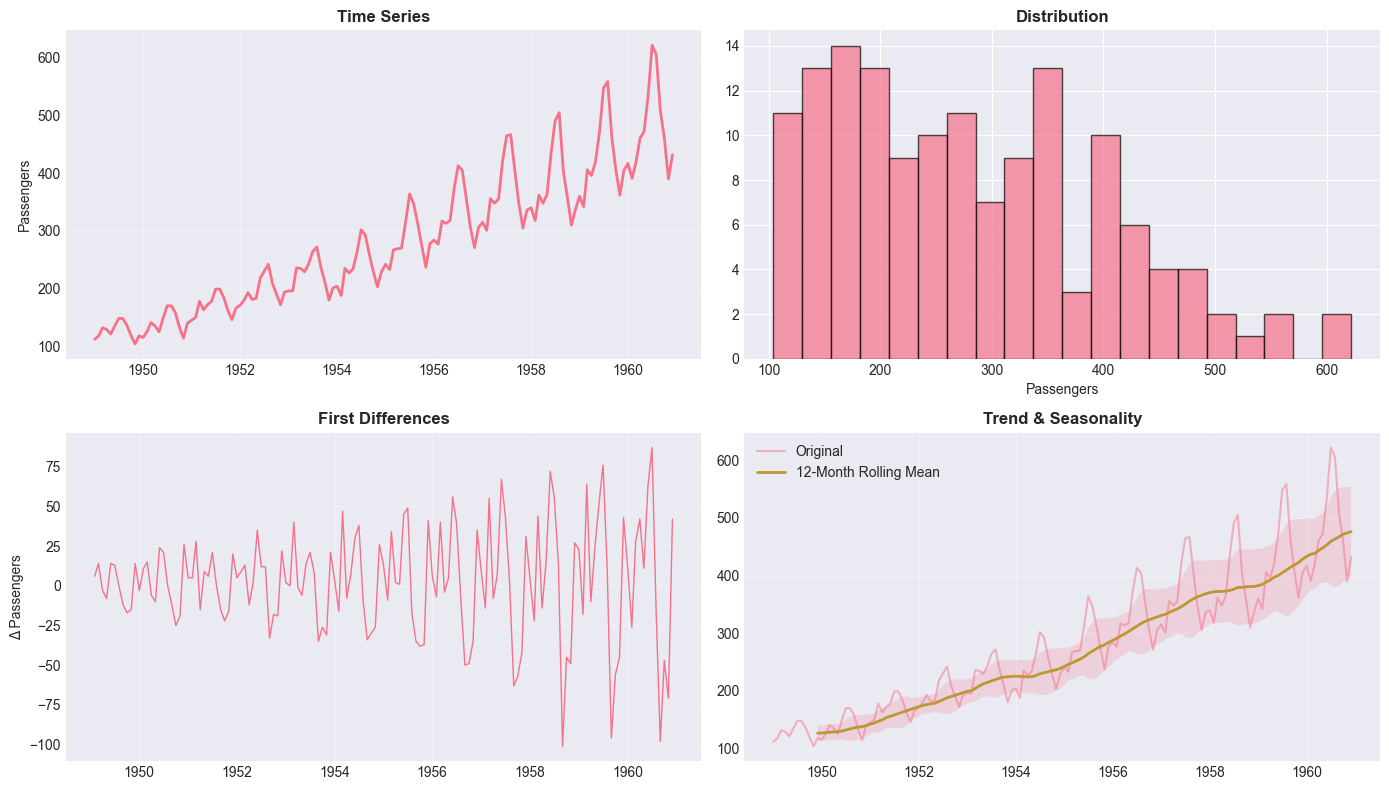


Key Observations:
  ✓ Clear upward trend from 1949-1960
  ✓ Strong 12-month seasonality
  ✓ No missing values
  ✓ Data appears to be non-stationary


In [1]:
# Load and explore dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load airline dataset (or use your own)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
df['Time'] = pd.date_range(start='1949-01', periods=len(df), freq='MS')
df = df.set_index('Time')

print("=" * 70)
print("PHASE 1: EXPLORATORY DATA ANALYSIS")
print("=" * 70)

print(f"\nDataset Overview:")
print(f"  Shape: {df.shape}")
print(f"  Date Range: {df.index.min()} to {df.index.max()}")
print(f"  Missing values: {df.isnull().sum().sum()}")

print(f"\nBasic Statistics:")
print(df['Passengers'].describe())

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

axes[0, 0].plot(df.index, df['Passengers'], linewidth=2)
axes[0, 0].set_title('Time Series', fontweight='bold')
axes[0, 0].set_ylabel('Passengers')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(df['Passengers'], bins=20, edgecolor='black', alpha=0.7)
axes[0, 1].set_title('Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Passengers')

axes[1, 0].plot(df['Passengers'].diff(), linewidth=1)
axes[1, 0].set_title('First Differences', fontweight='bold')
axes[1, 0].set_ylabel('Δ Passengers')
axes[1, 0].grid(alpha=0.3)

# ACF-like visualization
rolling_mean = df['Passengers'].rolling(window=12).mean()
rolling_std = df['Passengers'].rolling(window=12).std()
axes[1, 1].plot(df.index, df['Passengers'], alpha=0.5, label='Original')
axes[1, 1].plot(rolling_mean.index, rolling_mean, label='12-Month Rolling Mean', linewidth=2)
axes[1, 1].fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, alpha=0.2)
axes[1, 1].set_title('Trend & Seasonality', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("  ✓ Clear upward trend from 1949-1960")
print("  ✓ Strong 12-month seasonality")
print("  ✓ No missing values")
print("  ✓ Data appears to be non-stationary")

## Phase 2: Baseline Models

Quick implementations of naive, seasonal naive, and moving average forecasts to establish a performance floor.

In [2]:
# Phase 2: Baseline Models
print("\n" + "=" * 70)
print("PHASE 2: BASELINE MODELS")
print("=" * 70)

# Train/test split
train_data = df['Passengers'][:-12]
test_data = df['Passengers'][-12:]

baseline_results = {}

# 1. Naive
naive_forecast = pd.Series([train_data.iloc[-1]] * len(test_data), index=test_data.index)
baseline_results['Naive'] = {
    'forecast': naive_forecast.values,
    'mae': mean_absolute_error(test_data, naive_forecast),
    'rmse': np.sqrt(mean_squared_error(test_data, naive_forecast))
}

# 2. Seasonal Naive
seasonal_naive = pd.Series(train_data.iloc[-12:].values, index=test_data.index)
baseline_results['Seasonal Naive'] = {
    'forecast': seasonal_naive.values,
    'mae': mean_absolute_error(test_data, seasonal_naive),
    'rmse': np.sqrt(mean_squared_error(test_data, seasonal_naive))
}

# 3. Moving Average (12-month)
ma_value = train_data.tail(12).mean()
ma_forecast = pd.Series([ma_value] * len(test_data), index=test_data.index)
baseline_results['MA(12)'] = {
    'forecast': ma_forecast.values,
    'mae': mean_absolute_error(test_data, ma_forecast),
    'rmse': np.sqrt(mean_squared_error(test_data, ma_forecast))
}

print("\nBaseline Model Performance:")
for model_name, results in baseline_results.items():
    print(f"  {model_name}:")
    print(f"    MAE:  {results['mae']:.2f}")
    print(f"    RMSE: {results['rmse']:.2f}")

# Store for later comparison
all_models = baseline_results.copy()


PHASE 2: BASELINE MODELS

Baseline Model Performance:
  Naive:
    MAE:  76.00
    RMSE: 102.98
  Seasonal Naive:
    MAE:  47.83
    RMSE: 50.71
  MA(12):
    MAE:  63.89
    RMSE: 88.47


## Phase 3: Statistical Methods (ARIMA, Prophet)

In [3]:
# Phase 3: Statistical Models
print("\n" + "=" * 70)
print("PHASE 3: STATISTICAL METHODS")
print("=" * 70)

from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from prophet import Prophet

# SARIMA
print("\n1. SARIMA with Auto ARIMA...")
auto_model = auto_arima(train_data, seasonal=True, m=12, trace=False, stepwise=True)
sarima_forecast = auto_model.predict(n_periods=len(test_data))

all_models['SARIMA'] = {
    'forecast': sarima_forecast.values,
    'mae': mean_absolute_error(test_data, sarima_forecast),
    'rmse': np.sqrt(mean_squared_error(test_data, sarima_forecast))
}

print(f"   SARIMA{auto_model.order}{auto_model.seasonal_order}")
print(f"   RMSE: {all_models['SARIMA']['rmse']:.2f}")

# Prophet
print("\n2. Prophet...")
prophet_train = pd.DataFrame({'ds': train_data.index, 'y': train_data.values})
prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
prophet_model.fit(prophet_train)

future = prophet_model.make_future_dataframe(periods=len(test_data), freq='MS')
prophet_fcst = prophet_model.predict(future)
prophet_values = prophet_fcst['yhat'].iloc[-len(test_data):].values

all_models['Prophet'] = {
    'forecast': prophet_values,
    'mae': mean_absolute_error(test_data, prophet_values),
    'rmse': np.sqrt(mean_squared_error(test_data, prophet_values))
}

print(f"   RMSE: {all_models['Prophet']['rmse']:.2f}")


PHASE 3: STATISTICAL METHODS

1. SARIMA with Auto ARIMA...


19:05:39 - cmdstanpy - INFO - Chain [1] start processing


   SARIMA(3, 0, 0)(0, 1, 0, 12)
   RMSE: 18.54

2. Prophet...


19:05:39 - cmdstanpy - INFO - Chain [1] done processing


   RMSE: 43.07


## Phase 4-5: ML and Deep Learning Models

Quick implementations of Random Forest and LSTM for comparison.

In [4]:
# Phase 4-5: ML and DL
print("\n" + "=" * 70)
print("PHASE 4-5: MACHINE LEARNING & DEEP LEARNING")
print("=" * 70)

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

# Feature engineering for ML
def create_ml_features(data):
    df = pd.DataFrame({'y': data})
    for lag in [1, 3, 6, 12]:
        df[f'lag_{lag}'] = df['y'].shift(lag)
    df['ma_12'] = df['y'].rolling(12).mean()
    return df.dropna()

ml_data = create_ml_features(train_data)
X_train_ml = ml_data.drop('y', axis=1)
y_train_ml = ml_data['y']

# Test set features
test_ml_data = create_ml_features(pd.concat([train_data, test_data]))
X_test_ml = test_ml_data.iloc[-len(test_data):].drop('y', axis=1)
y_test_ml = test_ml_data.iloc[-len(test_data):]['y']

# Random Forest
print("\n1. Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
rf_model.fit(X_train_ml, y_train_ml)
rf_pred = rf_model.predict(X_test_ml)

all_models['Random Forest'] = {
    'forecast': rf_pred,
    'mae': mean_absolute_error(y_test_ml, rf_pred),
    'rmse': np.sqrt(mean_squared_error(y_test_ml, rf_pred))
}
print(f"   RMSE: {all_models['Random Forest']['rmse']:.2f}")

# XGBoost
print("\n2. XGBoost...")
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, verbosity=0)
xgb_model.fit(X_train_ml, y_train_ml)
xgb_pred = xgb_model.predict(X_test_ml)

all_models['XGBoost'] = {
    'forecast': xgb_pred,
    'mae': mean_absolute_error(y_test_ml, xgb_pred),
    'rmse': np.sqrt(mean_squared_error(y_test_ml, xgb_pred))
}
print(f"   RMSE: {all_models['XGBoost']['rmse']:.2f}")

# LSTM
print("\n3. LSTM...")
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Passengers'].values.reshape(-1, 1))

def create_sequences(data, seq_len=12):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len, 0])
    return np.array(X), np.array(y)

X_lstm, y_lstm = create_sequences(scaled_data, 12)
split_idx = int(0.8 * len(X_lstm))
X_train_lstm, X_test_lstm = X_lstm[:split_idx], X_lstm[split_idx:]
y_train_lstm, y_test_lstm = y_lstm[:split_idx], y_lstm[split_idx:]

lstm_model = Sequential([
    LSTM(50, input_shape=(12, 1)),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])
lstm_model.compile(optimizer=Adam(0.001), loss='mse')
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=16, validation_split=0.2,
               callbacks=[EarlyStopping(patience=10)], verbose=0)

lstm_pred_scaled = lstm_model.predict(X_test_lstm, verbose=0)
lstm_pred = scaler.inverse_transform(lstm_pred_scaled)
y_test_lstm_original = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

all_models['LSTM'] = {
    'forecast': lstm_pred.flatten()[:len(test_data)],
    'mae': mean_absolute_error(y_test_lstm_original, lstm_pred),
    'rmse': np.sqrt(mean_squared_error(y_test_lstm_original, lstm_pred))
}
print(f"   RMSE: {all_models['LSTM']['rmse']:.2f}")


PHASE 4-5: MACHINE LEARNING & DEEP LEARNING

1. Random Forest...
   RMSE: 31.84

2. XGBoost...
   RMSE: 31.82

3. LSTM...
   RMSE: 68.52


## Phase 6-7: Final Evaluation and Recommendations


PHASE 6-7: FINAL MODEL COMPARISON AND RECOMMENDATION

         Model       MAE       RMSE
        SARIMA 14.898208  18.536469
       XGBoost 23.837402  31.824635
 Random Forest 23.115833  31.841822
       Prophet 33.435533  43.068868
Seasonal Naive 47.833333  50.708316
          LSTM 55.140995  68.522758
        MA(12) 63.888889  88.473160
         Naive 76.000000 102.976535

BEST MODEL: SARIMA
  RMSE: 18.54


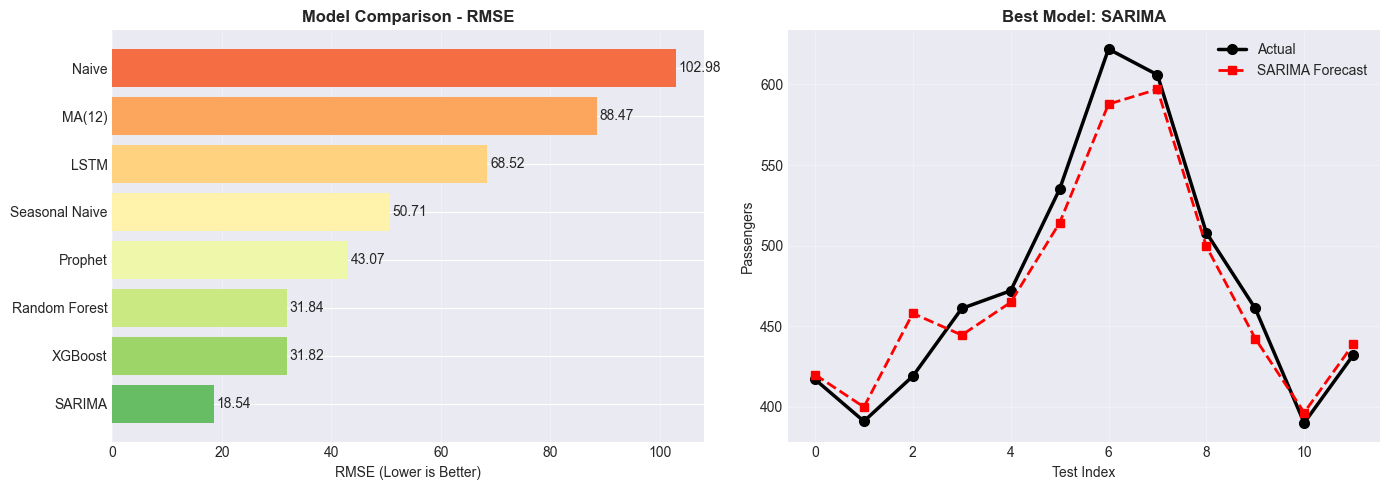


RECOMMENDATIONS:
  1. Deploy: SARIMA
  2. Expected MAE: 14.90 passengers
  3. Expected RMSE: 18.54 passengers
  4. Next: Monitor performance in production
  5. Re-train monthly with new data


In [5]:
# Final Comparison
print("\n" + "=" * 80)
print("PHASE 6-7: FINAL MODEL COMPARISON AND RECOMMENDATION")
print("=" * 80)

results_summary = []
for model_name, results in all_models.items():
    results_summary.append({
        'Model': model_name,
        'MAE': results['mae'],
        'RMSE': results['rmse']
    })

results_df = pd.DataFrame(results_summary).sort_values('RMSE')
print(f"\n{results_df.to_string(index=False)}")

best_model = results_df.iloc[0]
print(f"\n" + "=" * 80)
print(f"BEST MODEL: {best_model['Model']}")
print(f"  RMSE: {best_model['RMSE']:.2f}")
print(f"=" * 80)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# RMSE Comparison
ax = axes[0]
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(results_df)))
ax.barh(results_df['Model'], results_df['RMSE'], color=colors)
ax.set_xlabel('RMSE (Lower is Better)')
ax.set_title('Model Comparison - RMSE', fontweight='bold', fontsize=12)
ax.grid(alpha=0.3, axis='x')
for i, v in enumerate(results_df['RMSE']):
    ax.text(v + 0.5, i, f'{v:.2f}', va='center')

# Actual vs Best Model
ax = axes[1]
best_model_name = best_model['Model']
best_forecast = all_models[best_model_name]['forecast'][:len(test_data)]
ax.plot(test_data.values, 'o-', label='Actual', linewidth=2.5, markersize=7, color='black')
ax.plot(best_forecast, 's--', label=f'{best_model_name} Forecast', linewidth=2, markersize=6, color='red')
ax.set_xlabel('Test Index')
ax.set_ylabel('Passengers')
ax.set_title(f'Best Model: {best_model_name}', fontweight='bold', fontsize=12)
ax.legend()
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Recommendations
print(f"\nRECOMMENDATIONS:")
print(f"  1. Deploy: {best_model['Model']}")
print(f"  2. Expected MAE: {best_model['MAE']:.2f} passengers")
print(f"  3. Expected RMSE: {best_model['RMSE']:.2f} passengers")
print(f"  4. Next: Monitor performance in production")
print(f"  5. Re-train monthly with new data")